# Lecture 22: K-Means and Gaussian Mixture Models
***

<img src="figs/gmmbanner.png" width=1100 height=50>

**Reminder**:  Go to the botttom of the notebook and shift-enter the [helper functions](#helpers)
***

### Problem 1: Simple GMM and EM Example 
***
> This problem was adopted from Chapter 6 of the book *Machine Learning* by Tom. M. Mitchell

Consider the simple case where you have data drawn from a mixture of two 1D gaussians with fixed and identical variance.  Furthermore, we'll assume that there is no preference given to either of the distributions in the mixture.  The following plot shows the sampled points superimposed with the pdfs of the true distributions.  

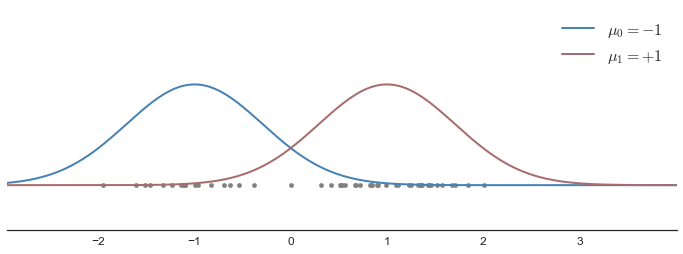

In [5]:
mu  = [-1, 1]; sig = [.5, .5]
X = prob1Data(50, mu, sig)
prob1Progress(X, mu, sig)

Take a look at the data.  It's pretty clear that you can make strong inferences about which Gaussian some of the points came from.  But the ones in the middle are a little tricker (especially because the Gaussians have identical variance).  The question is, given the data and the identical variance assumption, can we use an unsupervised learning algorithm to estimate the mean?  

It turns out that the EM algorithm can do just this.  Recall that EM is an iterative method that proceeds in two states 

$~~\bullet~~$ (E-Step): For each $i$ and $k$, estimate the probability that $x_i$ came from the Gaussian with $\mu_k$.  Since the two Gaussians are equally likely, we have:  

$$
r_{ik} = p(\mu=\mu_k ~|~ x_i) = 
\frac{\exp\{-(x_i -\mu_k)^2/2\sigma^2 \}}{\textstyle\sum_{j=1}^2\exp\{-(x_i -\mu_j)^2/2\sigma^2 \}}
$$

$~~\bullet~~$ (M-Step): Estimate each $\mu_k$ using the weighted average of the training examples

$$
\mu_k \leftarrow \frac{\textstyle\sum_{i=1}^m r_{ik}x_i}{\textstyle\sum_{i=1}^m r_{ik}}
$$

**Q**: The following code skeleton will compute a single iteration of the EM algorithm given a current guess for the means, stored in $\hat{\mu}$ to distinguish them from the $\mu$ used to simulate the data.  Your job is to complete the code for the E-Step and M-Step of the algorithm. 


**Hint**: Make sure you check the Helper Functions at the bottom.  You'll find some helpful things already implemented. 

In [ ]:
def EM(X, muh, sig=[0.5, 0.5]):
    
    # E-Step to estimate r_ik's 
    R = np.zeros((X.shape[0],len(muh)))
    for kk, (m, s) in enumerate(zip(muh, sig)):
        R[:,kk] = # TODO 
    R = # TODO 
    
    # M-Step to compute MLE of means 
    for kk in range(len(muh)):
        muh[kk] = # TODO 
        
    return muh

First we'll define an initial guess for the $\hat{\mu}$'s

In [ ]:
muh = [-2.0, -1.0]

If you've implemented the EM algorithm correctly, repeated shift-entering of the following cell should update the $\hat{\mu}$'s and show you your progress. 

In [ ]:
muh = EM(X, muh, sig)
prob1Progress(X, mu, sig, muh=muh)

**Q**: About how many iterations does it take for EM to converge? 

**Q**: Can you find an initial guess that will cause EM to get stuck in a local minimum? 

**Q**: What would you need to do to modify the code if you assume the variances are not fixed and identical? 

**Q**: What would you need to do to modify the code if you assume that the gaussians are selected with different probabilities? 



<br>
<br>

### Problem 2: Relationship between K-Means and GMMs with EM 
***

I claimed in the videos that K-Means and GMM/EM are equivalent in the case that you assume that the variances of the multivariate Gaussians are identical and assumed known and that the individual Gaussians are chosen uniformly.  In this exercise we'll prove that this is true.  

**Q**: What is the objective function you're trying to minimize in K-Means? 

**Q**: Given a specification of cluster membership for each ${\bf x}_i$, how do we update the means of the clusters?

**Q** Under the assumptions that $\Sigma_k = \Sigma = \textrm{diag}(\sigma^2, \ldots, \sigma^2)$ and that we've assigned examples $\{{\bf x}_i\}_{i=1}^m$ to specific clusters, what is the log-likelihood of the parameters $\mu_k$ and $\Sigma_k$? **Hint**: It's easier if you start with the likelihood over examples in a particular cluster.  In other words, what is $\ell(\mu_k, \Sigma_k ~|~ z = k)$? 

**Q**: What is the update rule for the means in the EM algorithm? 


<br><br><br><br>
<br><br><br><br>
<br><br><br><br>
<br><br><br><br>
<br><br><br><br>

<a id='helpers'></a>

<br> 

### Helper Functions
***

In [1]:
import numpy as np
import seaborn as sn 
import matplotlib.pyplot as plt
%matplotlib inline

sn.set_style("white")

def prob1Data(N=40, mu=[-1, 1], sig=[.5, .5], seed=1234):
    np.random.seed(seed)
    X = np.zeros(N)
    for ii in range(N):
        # Flip coin to decide which normal to draw from
        flip = int(np.round(np.random.uniform()))
        # Draw from normal 
        X[ii] = np.random.normal(mu[flip], sig[flip])
    return X 

def gaussianPDF(x, mu, sig):
    # Evaluate the guassian pdf parameterized by mu and sig for a given x
    return np.exp(-((x - mu)**2) / (2*sig*sig)) / np.sqrt(2*sig*sig*np.pi)
    

def prob1Progress(X, mu, sig, muh=None, sigh=None):
    
    # Make plots 
    mycolors = ["steelblue", "#a76c6e",  "#6a9373",  "orange", "gray"]
    fig = plt.figure(figsize=(12,4))
    ax = fig.add_subplot(111)
        
    # Plot true gaussians 
    x = np.linspace(np.min(X)-1,np.max(X)+2,400)
    for ii, (m, s) in enumerate(zip(mu, sig)):
        pdf = np.exp(-((x - m)**2) / (2*s)) / np.sqrt(2*s*np.pi)
        ax.plot(x, pdf, lw=2, color=mycolors[ii], label=r"$\mu_{%s} = {%+.3g}$"%(ii, m))
        
    # Plot data 
    ax.scatter(X, np.zeros(X.shape), color="gray")
    
    # Plot estimated means 
    if np.any(muh): 
        for ii, m in enumerate(muh):
            pdf = np.exp(-((x - m)**2) / (2*s)) / np.sqrt(2*s*np.pi)
            ax.plot(x, pdf, lw=2, ls='--', color=mycolors[ii], label=r"$\mu_{%s} = {%+.3g}$"%(ii, m))
        
    # Make legend 
    ax.legend(loc="upper right", fontsize=16)
        
    # Make pretty 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlim([np.min(x), np.max(x)])
    ax.set_ylim([-0.25, 1.0])
    plt.xticks([-2,-1,0,1,2,3], fontsize=12)
    plt.yticks([], fontsize=16)
    
    
from IPython.core.display import HTML
HTML("""
<style>
.MathJax nobr>span.math>span{border-left-width:0 !important};
</style>
""")